# Stock Price Prediction Using ARIMA, ARIMAX, and LSTM Models

##  Introduction
In this project, I worked with historical stock data for two major IT companies in India: **TCS** and **Infosys**. The main objective was to build models that can forecast stock prices, evaluate their accuracy, and analyze which model performs best.

I implemented and compared **ARIMA**, **ARIMAX**, and **LSTM** models on these time series datasets to forecast the **Close price** of each stock.

---
## Structure of the Project

## 1. Data Preprocessing

- Dropped the **'Trades'** column as it was not needed.
- Filled missing values in **'Deliverable Volume'** and **'% Deliverable'** using **forward fill (ffill)** and **backward fill (bfill)**.
- Converted the **'Date'** column to datetime format and set it as the index.
- Sorted the data based on the date.
- Plotted a simple graph to compare **TCS and Infosys closing prices** over time.

These steps helped prepare the data for ARIMA, ARIMAX, and LSTM models.

---

##  1.a Stationarity Check: ADF Test

Since ARIMA/ARIMAX models require stationary data:

- Performed **Augmented Dickey-Fuller (ADF) Test**.
- For TCS, the original data was **non-stationary** but became **stationary after differencing (d=1)**.
- For Infosys, the data was already **stationary** without differencing.

---

##  1.b ACF and PACF Plots

To determine the parameters (p, d, q) for ARIMA/ARIMAX:

- Plotted **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)**.
- Used them to decide the **optimal values** for the ARIMA models.

---
##  2. Models Implemented

### 2.a ARIMA Model

- A univariate model using only 'Close' price.
- Trained using 80% of the data.
- Predicted the Close price for the remaining 20%.

### 2.b ARIMAX Model

- Used 'Open' price as an exogenous variable.
- Trained using 80% of the data.
- Predicted the Close price for the remaining 20%.

### 2.c LSTM Model

- A deep learning model that captures time-based dependencies.
- Required data normalization and reshaping into 3D sequences.
- Predicted closing prices after being trained on 80% of the data.

---

##  3. Evaluation Metrics

For all models, the following metrics were used for comparison:

- **MAE (Mean Absolute Error)**
- **MSE (Mean Squared Error)**
- **RMSE (Root Mean Squared Error)**

These help quantify the prediction errors and decide which model performs best.


---



**Next:** You can continue into the model implementation cells.

# 1. Data Preprocessing

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load TCS and INFOSYS stock data

df_tcs = pd.read_csv("/content/drive/MyDrive/TCS.csv")

df_infosys = pd.read_csv("/content/drive/MyDrive/INFY.csv")

In [4]:
# Display first five rows

print("TCS\n")
display(df_tcs.head())

print("\nINFOSYS\n")
display(df_infosys.head())



TCS



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624



INFOSYS



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [5]:
# Display last five rows

print("TCS\n")
display(df_tcs.tail())

print("\nINFOSYS\n")
display(df_infosys.tail())

TCS



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,2021-04-26,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.0,1345353,0.5402
4135,2021-04-27,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.0,849767,0.5775
4136,2021-04-28,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.0,847762,0.5172
4137,2021-04-29,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.0,837567,0.5166
4138,2021-04-30,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411057e+14,157829.0,1942473,0.6323



INFOSYS



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,INFY,EQ,1333.80,1332.25,1351.3,1321.00,1345.0,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,2021-04-27,INFY,EQ,1343.55,1346.00,1353.0,1340.15,1347.5,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,2021-04-28,INFY,EQ,1348.50,1358.00,1359.5,1344.60,1355.8,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,2021-04-29,INFY,EQ,1356.00,1368.00,1369.0,1351.40,1356.0,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785
5305,2021-04-30,INFY,EQ,1356.35,1346.30,1373.9,1345.90,1348.6,1354.35,1361.16,8354677,1.137203e+15,131718.0,5408113.0,0.6473


In [6]:
# Display number of rows and columns

print("TCS\n")
display(df_tcs.shape)

print("\nINFOSYS\n")
display(df_infosys.shape)

TCS



(4139, 15)


INFOSYS



(5306, 15)

In [7]:
# Check missing values in each columns

print("TCS\n")
display(df_tcs.isnull().sum())

print("\nINFOSYS\n")
display(df_infosys.isnull().sum())

TCS



,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0



INFOSYS



,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [8]:
# Drop Trades column

df_tcs = df_tcs.drop(columns = ['Trades'])


df_infosys = df_infosys.drop(columns = ['Trades'])

In [9]:
# Display columns

print(df_tcs.columns)

print("\n")

print(df_infosys.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [10]:
# Remove spaces from column names

df_tcs.columns = df_tcs.columns.str.strip()
df_infosys.columns = df_infosys.columns.str.strip()

In [11]:
# Check missing values before filling
print("Missing values before filling:")
print(df_infosys[['Deliverable Volume', '%Deliverble']].isna().sum())

# Fill using forward fill
df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='ffill')
df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='ffill')

# Fill using backward fill
df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='bfill')
df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='bfill')

# Final check
print("\nMissing values after filling:")
print(df_infosys[['Deliverable Volume', '%Deliverble']].isna().sum())


Missing values before filling:
Deliverable Volume    509
%Deliverble           509
dtype: int64

Missing values after filling:
Deliverable Volume    0
%Deliverble           0
dtype: int64


<ipython-input-11-9bb1d050d5d0>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='ffill')
<ipython-input-11-9bb1d050d5d0>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['%Deliverble'] = df_infosys['%Deliverble'].fillna(method='ffill')
<ipython-input-11-9bb1d050d5d0>:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['Deliverable Volume'] = df_infosys['Deliverable Volume'].fillna(method='bfill')
<ipython-input-11-9bb1d050d5d0>:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_infosys['%Deliverble'] = df_infosys['%Deliverble'].filln

In [12]:
# Again checking missing values in columns

print("TCS\n")
display(df_tcs.isnull().sum())

print("\nINFOSYS\n")
display(df_infosys.isnull().sum())

TCS



,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0



INFOSYS



,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [13]:
# Display Information

df_tcs.info()
print("\n")
df_infosys.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Deliverable Volume  4139 non-null   int64  
 13  %Deliverble         4139 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 452.8+ KB


<class 'pandas.core.frame.DataFrame'>
Range

In [14]:
# Display Summary Statistics

display(df_tcs.describe())

print("\n")

display(df_infosys.describe())


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,4.139000e+03,4139.000000
mean,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,8.952206e+05,0.549429
std,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,8.637908e+05,0.132867
min,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,7.765000e+03,0.121400
25%,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,4.334740e+05,0.459100
50%,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,7.052640e+05,0.553800
75%,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,1.136132e+06,0.646850
max,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,3.155626e+07,0.962200


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,5.306000e+03,5306.000000
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14,1.428603e+06,0.490515
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14,2.204350e+06,0.221305
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,4.352000e+03,0.045800
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14,2.780420e+05,0.370775
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14,6.952120e+05,0.559750
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14,1.792239e+06,0.653325
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,5.775916e+07,0.996000


# Convert Date into Date time Format

In [15]:
# Convert the 'Date' column to datetime format and set it as the index for time series analysis

df_tcs['Date'] = pd.to_datetime(df_tcs['Date'])
df_tcs.set_index('Date', inplace=True)

df_infosys['Date'] = pd.to_datetime(df_infosys['Date'])
df_infosys.set_index('Date', inplace=True)

In [16]:
# Check again first five rows

display(df_tcs.head())
display(df_infosys.head())


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,695234,0.2624


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,51977.0,0.056
2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,51977.0,0.056
2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,51977.0,0.056
2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,51977.0,0.056
2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,51977.0,0.056


# TCS and INFOSYS Closing Price Over time Visualizations

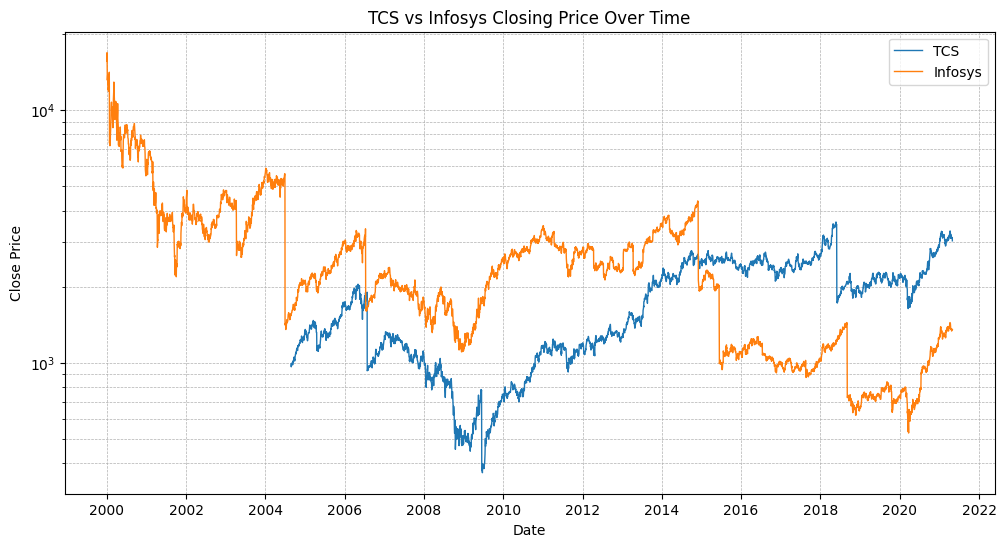

In [17]:
# Import matplotlib.dates to format date labels on time series plots
import matplotlib.dates as mdates

# Create the figure and plot
plt.figure(figsize=(12,6))

# Plot TCS and Infosys closing prices
plt.plot(df_tcs.index, df_tcs['Close'], label='TCS', linewidth=1)
plt.plot(df_infosys.index, df_infosys['Close'], label='Infosys', linewidth=1)

# Set log scale for the y-axis
plt.yscale('log')

# Formatting the x-axis to show yearly ticks
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))



# Add labels, title, and legend
plt.title("TCS vs Infosys Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show the plot
plt.show()


# 1.a Testing for Stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller

# Function to perform the Augmented Dickey-Fuller test
def adfuller_test(series, stock_name):
    print(f"\nADF Test for {stock_name} Closing Price")
    print("-" * 50)
    result = adfuller(series.dropna())
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']

    for value, label in zip(result[:4], labels):
        print(f"{label} : {value}")

    # Check stationarity
    p_value = result[1]
    if p_value <= 0.05:
        print("Reject Null Hypothesis: The data is stationary")
    else:
        print("Accept Null Hypothesis: The data is NOT stationary")

# Perform ADF test for both stocks
adfuller_test(df_tcs['Close'], "TCS")
adfuller_test(df_infosys['Close'], "Infosys")



ADF Test for TCS Closing Price
--------------------------------------------------
ADF Test Statistic : -1.6454979007348989
p-value : 0.45938944755183037
#Lags Used : 0
Number of Observations Used : 4138
Accept Null Hypothesis: The data is NOT stationary

ADF Test for Infosys Closing Price
--------------------------------------------------
ADF Test Statistic : -4.817812417828051
p-value : 5.027571658411525e-05
#Lags Used : 33
Number of Observations Used : 5272
Reject Null Hypothesis: The data is stationary


# Differencing for TCS data

In [19]:
df_tcs['Close_diff'] = df_tcs['Close'].diff().dropna()

# Run ADF test again on differenced data
adfuller_test(df_tcs['Close_diff'].dropna(), "TCS Differenced")


ADF Test for TCS Differenced Closing Price
--------------------------------------------------
ADF Test Statistic : -46.6241577679185
p-value : 0.0
#Lags Used : 1
Number of Observations Used : 4136
Reject Null Hypothesis: The data is stationary


# 1.b ACF and PACF plot for TCS

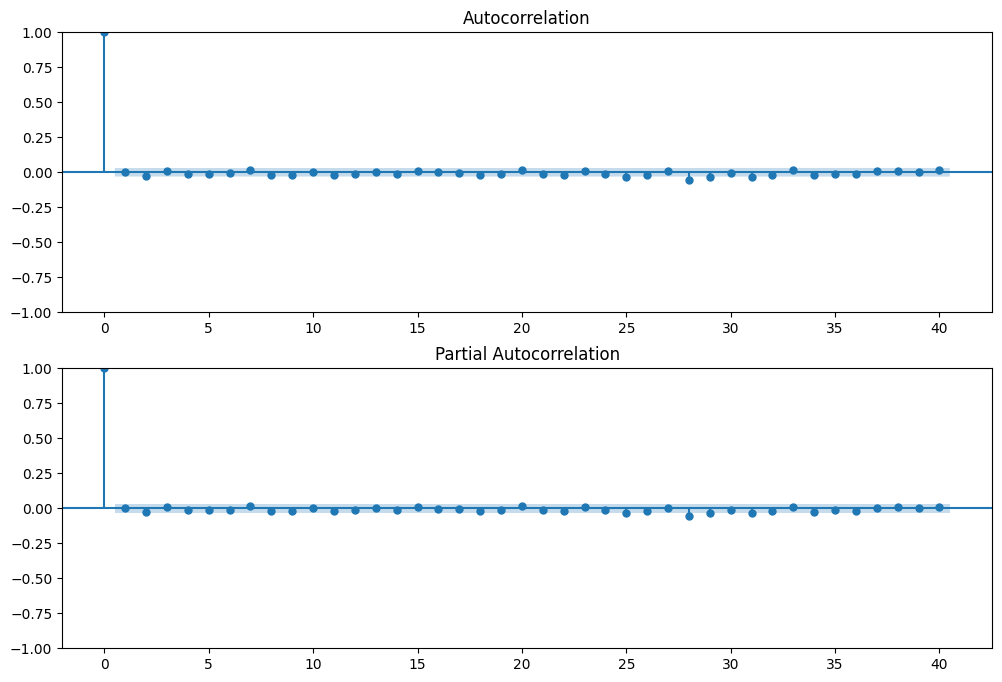

In [20]:
# Import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ACF and PACF Plots for TCS
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_tcs['Close_diff'].dropna(), lags=40, ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_tcs['Close_diff'].dropna(), lags=40, ax=ax2)

plt.show()



# ACF and PACF plot for INFOSYS

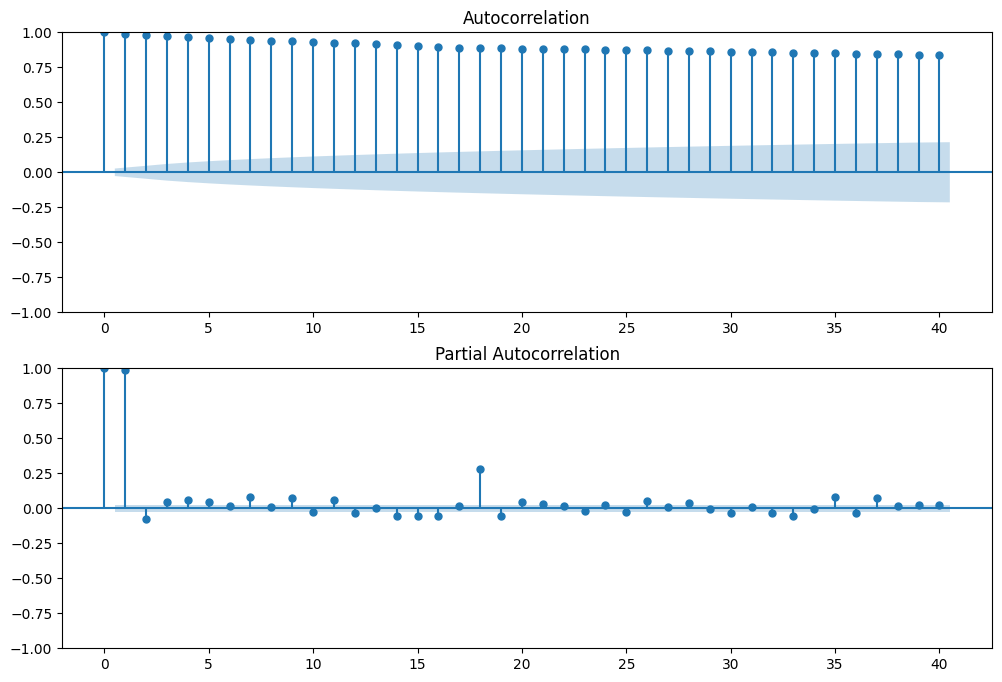

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig = plt.figure(figsize=(12,8))

# ACF Plot
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_infosys['Close'], lags=40, ax=ax1)

# PACF Plot
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_infosys['Close'], lags=40, ax=ax2)

# Show the plots
plt.show()


# Train-Test Split

In [22]:
# Calculate training set size for TCS
train_size_tcs = int(len(df_tcs) * 0.8)

# Calculate training set size for Infosys
train_size_infosys = int(len(df_infosys) * 0.8)

# Split TCS data
train_tcs = df_tcs.iloc[:train_size_tcs].dropna()
test_tcs = df_tcs.iloc[train_size_tcs:].dropna()

# Split Infosys data
train_infosys = df_infosys.iloc[:train_size_infosys].dropna()
test_infosys = df_infosys.iloc[train_size_infosys:].dropna()

# Print dataset sizes
print(f"TCS     - Training Data: {len(train_tcs)} | Testing Data: {len(test_tcs)}")
print(f"Infosys - Training Data: {len(train_infosys)} | Testing Data: {len(test_infosys)}")


TCS     - Training Data: 3310 | Testing Data: 828
Infosys - Training Data: 4244 | Testing Data: 1062


In [23]:
# Convert train test data to business day frequency

train_tcs = train_tcs.asfreq('B')
test_tcs = test_tcs.asfreq('B')


# Models Implementation

# 2.a ARIMA Model for TCS

In [24]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_tcs = ARIMA(train_tcs['Close'], order=(2,1,2))
tcs_fit = model_tcs.fit()

# Print summary
print(tcs_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3476
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -16157.340
Date:                Tue, 22 Apr 2025   AIC                          32324.679
Time:                        11:08:07   BIC                          32355.446
Sample:                    08-26-2004   HQIC                         32335.663
                         - 12-21-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0571      0.048     -1.185      0.236      -0.151       0.037
ar.L2          0.8801      0.047     18.747      0.000       0.788       0.972
ma.L1          0.0454      0.041      1.118      0.2

In [25]:
# Forecast for the test set data
forecast_steps = len(test_tcs)
forecast_tcs = tcs_fit.forecast(steps=forecast_steps)

# Convert to Pandas Series with correct index
forecast_series = pd.Series(forecast_tcs, index=test_tcs.index)

# Display the forecasted values
print("Forecasted Close Prices for TCS:")
display(forecast_series.head())



Forecasted Close Prices for TCS:


,predicted_mean
Date,
2017-12-22,2596.884384
2017-12-25,2597.002529
2017-12-26,2598.038221
2017-12-27,2598.083092
2017-12-28,2598.992095


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure forecast and test data are correctly aligned and have the same index
forecast_series = forecast_series.reindex(test_tcs.index)
forecast_series = forecast_series[:len(test_tcs)]

# Remove rows with NaN values in either test_tcs['Close'] or forecast_series
valid_indices = ~np.isnan(test_tcs['Close']) & ~np.isnan(forecast_series)
test_tcs_valid = test_tcs[valid_indices]
forecast_series_valid = forecast_series[valid_indices]

# Calculate error metrics
mae = mean_absolute_error(test_tcs_valid['Close'], forecast_series_valid)
mse = mean_squared_error(test_tcs_valid['Close'], forecast_series_valid)
rmse = np.sqrt(mse)

# Print Results
print(f"TCS Model Performance Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



TCS Model Performance Metrics:

Mean Absolute Error (MAE): 499.54
Mean Squared Error (MSE): 289641.34
Root Mean Squared Error (RMSE): 538.18


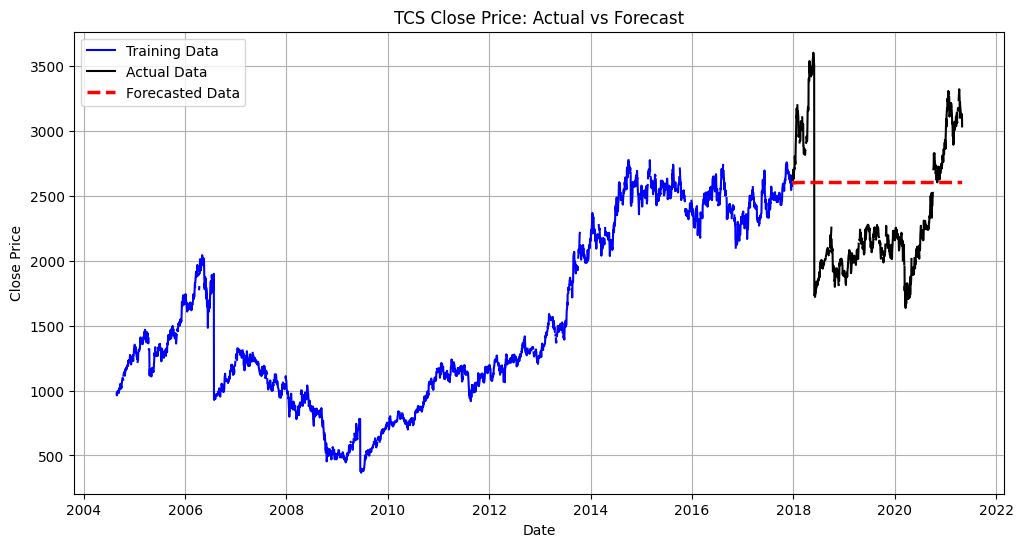

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot Training Data
plt.plot(train_tcs.index, train_tcs['Close'], label="Training Data", color="blue")

# Plot Actual Test Data
plt.plot(test_tcs.index, test_tcs['Close'], label="Actual Data", color="black")

# Plot Forecasted Data
plt.plot(forecast_series.index, forecast_series,
         label="Forecasted Data", color="red",
         linewidth=2.5, linestyle="--")

plt.title("TCS Close Price: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# ARIMA Model for INFOSYS

In [29]:
# Convert train test data to business day frequency
train_infosys = train_infosys.asfreq('B')
test_infosys = test_infosys.asfreq('B')


In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model
model_infosys = ARIMA(train_infosys['Close'], order=(1,1,2))
infosys_fit = model_infosys.fit()

# Print summary
print(infosys_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4444
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -27489.047
Date:                Tue, 22 Apr 2025   AIC                          54986.095
Time:                        11:08:46   BIC                          55011.691
Sample:                    01-03-2000   HQIC                         54995.120
                         - 01-12-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9806      0.014    -68.327      0.000      -1.009      -0.952
ma.L1          1.1244      0.015     74.534      0.000       1.095       1.154
ma.L2          0.1361      0.005     26.633      0.0

In [31]:
# Forecast for the test set length
forecast_step = len(test_infosys)
forecast_infosys = infosys_fit.forecast(steps=forecast_step)

# Convert to Pandas Series with correct index
forecast_series_infosys = pd.Series(forecast_infosys, index=test_infosys.index)

# Display the forecasted values
print("Forecasted Close Prices for Infosys:")
display(forecast_series_infosys.head())



Forecasted Close Prices for Infosys:


,predicted_mean
Date,
2017-01-13,1004.313843
2017-01-16,1004.342706
2017-01-17,1004.314403
2017-01-18,1004.342157
2017-01-19,1004.314941


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure forecast and test data are correctly aligned and have the same index
forecast_series_infosys = forecast_series_infosys.reindex(test_infosys.index)
forecast_series_infosys = forecast_series_infosys[:len(test_infosys)]

# Remove rows with NaN values in either test_infosys['Close'] or forecast_series_infosys
valid_indices = ~np.isnan(test_infosys['Close']) & ~np.isnan(forecast_series_infosys)
test_infosys_valid = test_infosys[valid_indices]
forecast_series_valid = forecast_series_infosys[valid_indices]

# Calculate error metrics
mae = mean_absolute_error(test_infosys_valid['Close'], forecast_series_valid)
mse = mean_squared_error(test_infosys_valid['Close'], forecast_series_valid)
rmse = np.sqrt(mse)

# Print Results
print(f"Infosys Model Performance Metrics:\n")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Infosys Model Performance Metrics:

Mean Absolute Error (MAE): 201.01
Mean Squared Error (MSE): 54585.48
Root Mean Squared Error (RMSE): 233.64


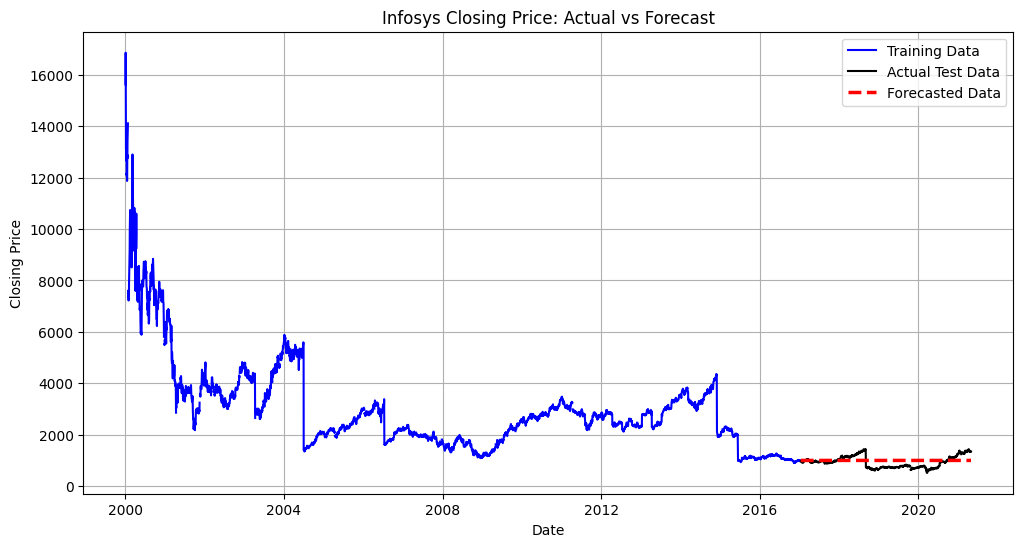

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Plot Training Data
plt.plot(train_infosys.index, train_infosys['Close'], label="Training Data", color="blue")

# Plot Actual Test Data
plt.plot(test_infosys.index, test_infosys['Close'], label="Actual Test Data", color="black")

# Plot Forecasted Data
plt.plot(forecast_series_infosys.index, forecast_series_infosys,
         label="Forecasted Data", color="red",
         linewidth=2.5, linestyle="--")

plt.title("Infosys Closing Price: Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# 2.b ARIMAX Model for TCS Using Open as Exogenous

In [34]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [35]:
# Select only 'Close' and 'Open'
df_tcs = df_tcs[['Close', 'Open']]

# Drop rows where either is NaN or inf
df_tcs = df_tcs.replace([np.inf, -np.inf], np.nan).dropna()

# Confirm clean data
print(df_tcs.isna().sum())
print(np.isinf(df_tcs).sum())


Close    0
Open     0
dtype: int64
Close    0
Open     0
dtype: int64


In [36]:
# Split the TCS data into 80% training and 20% testing sets
train_size = int(len(df_tcs) * 0.8)

train = df_tcs.iloc[:train_size]
test = df_tcs.iloc[train_size:]


In [37]:
# Double-check index alignment
train = train.copy()
train = train[['Close', 'Open']].dropna()

print(train.head())


             Close    Open
Date                      
2004-08-25  987.95  1198.7
2004-08-26  979.00   992.0
2004-08-27  962.65   982.4
2004-08-30  986.75   969.9
2004-08-31  988.10   986.5


In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit ARIMAX
model = SARIMAX(
    # Endogenous variable
    train['Close'],
    # Exogenous variable
    exog=train[['Open']],
    order=(2, 1, 2)
)
arimax_fit = model.fit()

# Summary
print(arimax_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3311
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -15530.300
Date:                Tue, 22 Apr 2025   AIC                          31072.600
Time:                        11:09:36   BIC                          31109.229
Sample:                             0   HQIC                         31085.710
                               - 3311                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9781      0.006    159.372      0.000       0.966       0.990
ar.L1         -0.8029      0.225     -3.567      0.000      -1.244      -0.362
ar.L2          0.0092      0.018      0.515      0.6

In [39]:
# Prepare exogenous variable (Open) from test set
X_test_clean = test[['Open']].copy()
X_test_clean = X_test_clean.dropna()
# Define the actual Close values from the test set
y_test_tcs = test['Close']



In [40]:
# Use get_forecast to make predictions using the ARIMAX model
forecast_obj = arimax_fit.get_forecast(steps=len(X_test_clean), exog=X_test_clean)

# Extract the predicted values and assign the correct index
forecast_series_tcs = forecast_obj.predicted_mean
forecast_series_tcs.index = X_test_clean.index

# Display the forecasted Close prices
print("Forecasted Close Prices for TCS:")
display(forecast_series_tcs.head())



Forecasted Close Prices for TCS:


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
Date,
2017-12-22,2603.927250
2017-12-26,2683.359381
2017-12-27,2648.151244
2017-12-28,2607.953199
2017-12-29,2622.297766


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Drop any NaNs before evaluation (if any)
valid_idx = ~y_test_tcs.isna() & ~forecast_series_tcs.isna()
y_true = y_test_tcs[valid_idx]
y_pred = forecast_series_tcs[valid_idx]

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Print performance
print("\nARIMAX Model Performance for TCS")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")



ARIMAX Model Performance for TCS
MAE: 28.82
MSE: 1468.10
RMSE: 38.32


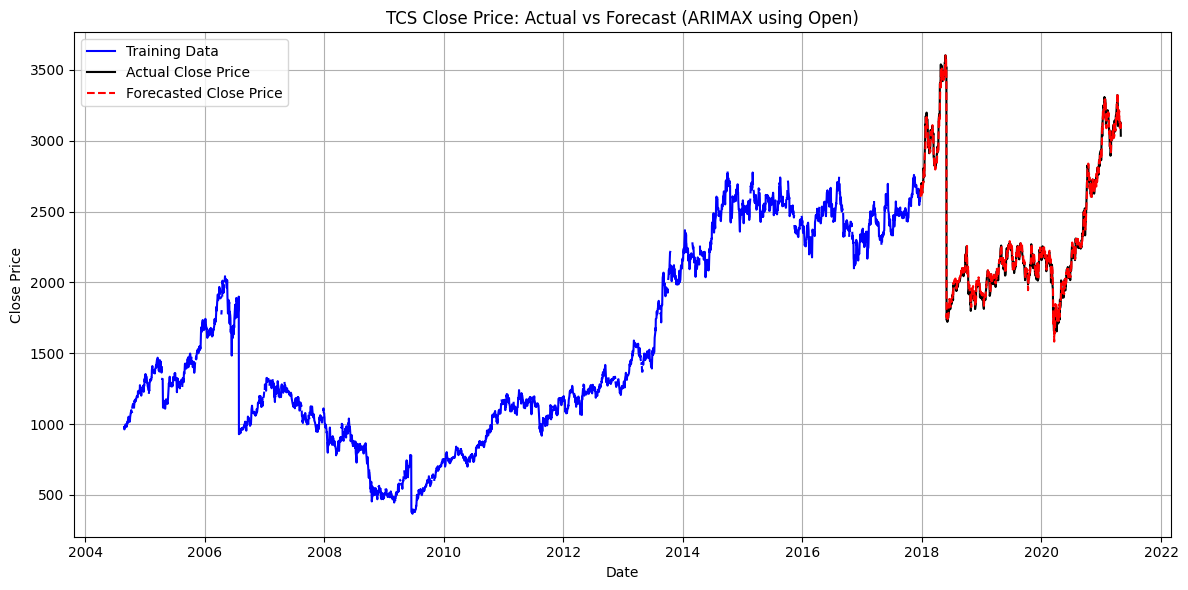

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

# Training data
plt.plot(train_tcs.index, train_tcs['Close'], label="Training Data", color='blue')

# Actual Test Data
plt.plot(y_test_tcs.index, y_test_tcs, label="Actual Close Price", color='black')

# Forecasted Close Price
plt.plot(forecast_series_tcs.index, forecast_series_tcs,
         label="Forecasted Close Price", color='red', linestyle='dashed')

plt.title("TCS Close Price: Actual vs Forecast (ARIMAX using Open)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ARIMAX Model for INFOSYS Using Open as Exogenous

Close    0
Open     0
dtype: int64
Close    0
Open     0
dtype: int64
               Close      Open
Date                          
2000-01-03  15625.20  15625.00
2000-01-04  16855.90  16800.00
2000-01-05  15507.45  15701.00
2000-01-06  14266.85  15256.65
2000-01-07  13125.50  13125.50


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4244
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -26067.938
Date:                Tue, 22 Apr 2025   AIC                          52147.876
Time:                        11:10:12   BIC                          52185.995
Sample:                             0   HQIC                         52161.348
                               - 4244                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9974      0.000   4716.503      0.000       0.997       0.998
ar.L1         -0.2840      0.011    -25.777      0.000      -0.306      -0.262
ar.L2         -0.9333      0.012    -79.173      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


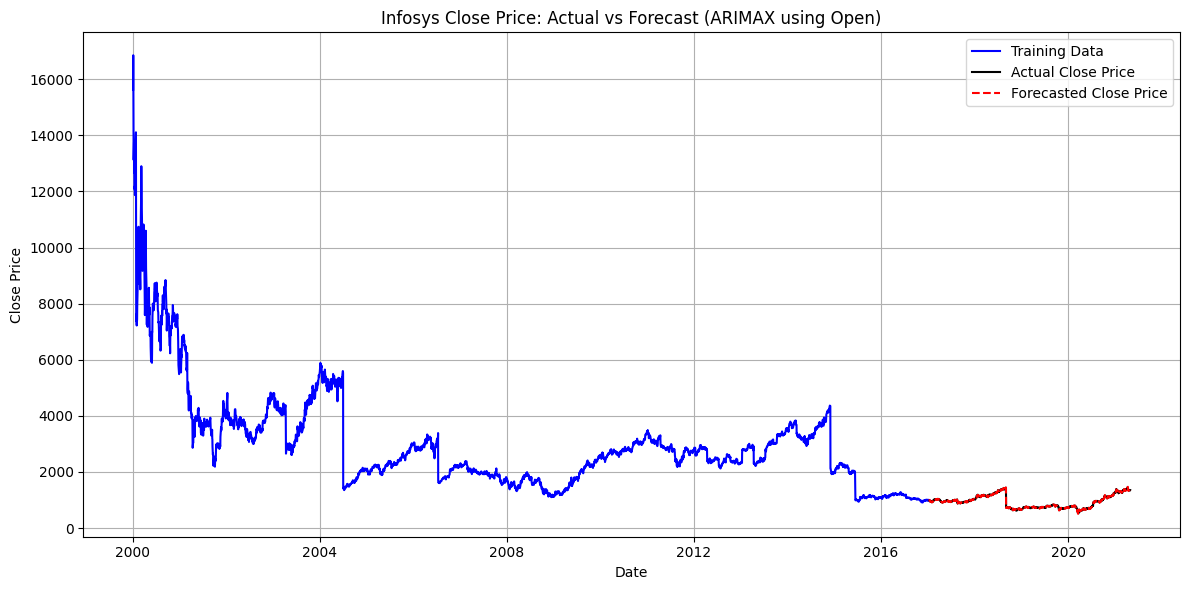

In [43]:

# Select only 'Close' and 'Open'
df_infosys = df_infosys[['Close', 'Open']]

# Drop rows where either is NaN or inf
df_infosys = df_infosys.replace([np.inf, -np.inf], np.nan).dropna()

# Confirm clean data
print(df_infosys.isna().sum())
print(np.isinf(df_infosys).sum())

# Train-test split
train_size = int(len(df_infosys) * 0.8)
train_infy = df_infosys.iloc[:train_size]
test_infy = df_infosys.iloc[train_size:]

# Clean training data
train_infy = train_infy.copy()
train_infy = train_infy[['Close', 'Open']].dropna()
print(train_infy.head())

# Step 3: Fit ARIMAX model
model_infy = SARIMAX(
    train_infy['Close'],
    exog=train_infy[['Open']],
    order=(2, 0, 2)
)
arimax_fit_infy = model_infy.fit()
print(arimax_fit_infy.summary())

# Clean test set
y_test_infy = test_infy['Close']
X_test_infy = test_infy[['Open']]

# Align and drop NaNs
y_test_infy_clean = y_test_infy.dropna()
X_test_infy_clean = X_test_infy.loc[y_test_infy_clean.index]

# Forecast
forecast_obj_infy = arimax_fit_infy.get_forecast(steps=len(X_test_infy_clean), exog=X_test_infy_clean)
forecast_series_infy = forecast_obj_infy.predicted_mean
forecast_series_infy.index = X_test_infy_clean.index
print("NaNs in forecast:", forecast_series_infy.isna().sum())

# Evaluate the model
valid_idx = ~y_test_infy.isna() & ~forecast_series_infy.isna()
y_true_infy = y_test_infy[valid_idx]
y_pred_infy = forecast_series_infy[valid_idx]

mae = mean_absolute_error(y_true_infy, y_pred_infy)
mse = mean_squared_error(y_true_infy, y_pred_infy)
rmse = np.sqrt(mse)

print("\nARIMAX Model Performance for Infosys")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train_infy.index, train_infy['Close'], label="Training Data", color='blue')
plt.plot(y_test_infy.index, y_test_infy, label="Actual Close Price", color='black')
plt.plot(forecast_series_infy.index, forecast_series_infy,
         label="Forecasted Close Price", color='red', linestyle='dashed')

plt.title("Infosys Close Price: Actual vs Forecast (ARIMAX using Open)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2.c LSTM Implementation for TCS

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [45]:
# Load and Prepare Data
close_prices = df_tcs[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_scaled = scaler.fit_transform(close_prices)

In [46]:
# Create Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(close_scaled, window_size)

In [47]:
# Train-Test Split (80-20)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [48]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.0141
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.7806e-04
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.0902e-04
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.0013e-04
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.8096e-04
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.9602e-04
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 3.2624e-04
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2490e-04
Epoch 9/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.6266e-04
Epoch 10/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8935e-04
Epoch 11/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 2.4388e-04
Epoch 12/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.8255e-04
Epoch 13/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.4617e-04
Epoch 14/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 2.

In [51]:
# Make Predictions
y_pred = model.predict(X_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [52]:
# Inverse Transform for Evaluation
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)

print("\nLSTM Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


LSTM Model Performance:
MAE: 45.45
MSE: 9198.15
RMSE: 95.91


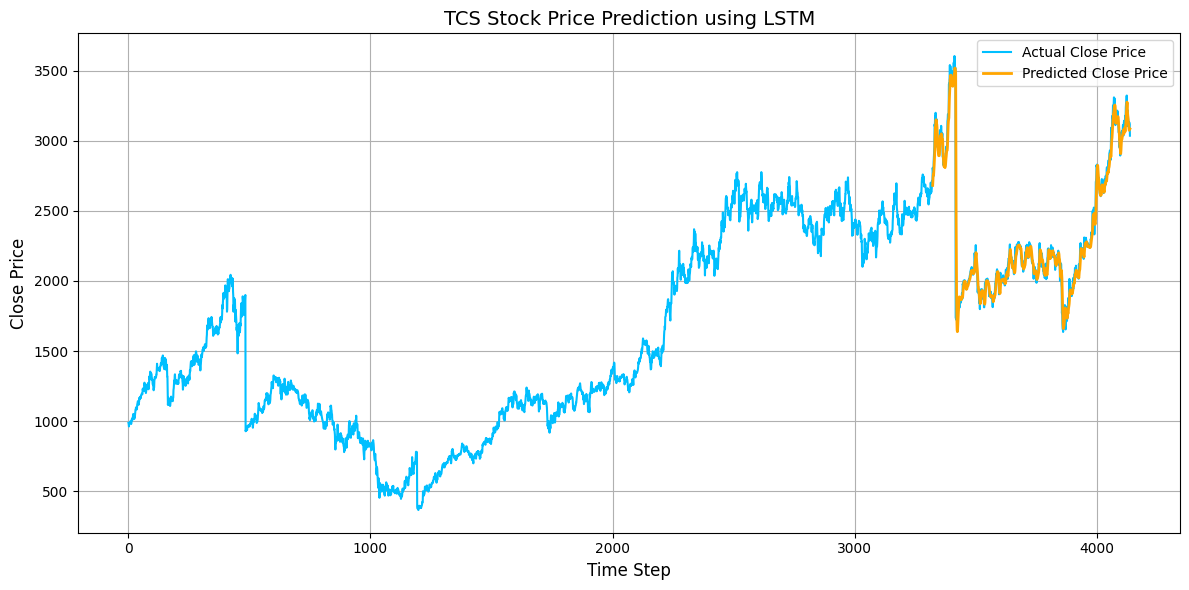

In [54]:
# Plot Forecast-Style
plt.figure(figsize=(12, 6))

# Plot full actual close prices
plt.plot(scaler.inverse_transform(close_scaled), label='Actual Close Price', color='deepskyblue')

# Create empty array for forecast-style plot
pred_plot = np.empty_like(close_scaled)
pred_plot[:, :] = np.nan
pred_plot[len(close_scaled) - len(y_pred_inverse):, :] = y_pred_inverse.reshape(-1, 1)

plt.plot(pred_plot, label='Predicted Close Price', color='orange', linewidth=2)
plt.title("TCS Stock Price Prediction using LSTM", fontsize=14)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# LSTM Implementation for Infosys

In [55]:
# Load and Prepare Data
close_prices = df_infosys[['Close']].copy()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_scaled = scaler.fit_transform(close_prices)

In [56]:
# Create Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(close_scaled, window_size)

In [57]:
# Train-Test Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [58]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0040
Epoch 2/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.4897e-04
Epoch 3/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 2.1033e-04
Epoch 4/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.1921e-04
Epoch 5/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8321e-04
Epoch 6/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.7441e-04
Epoch 7/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 1.5532e-04
Epoch 8/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 3.6516e-04
Epoch 9/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.3527e-04
Epoch 10/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.3771e-04
Epoch 11/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.6647e-04
Epoch 12/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0357e-04
Epoch 13/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.2782e-04
Epoch 14/20
132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 1.

In [61]:
# Make Predictions
y_pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [62]:
# Inverse Transform for Evaluation
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

# Evaluation
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)

print("\nLSTM Model Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


LSTM Model Performance:
MAE: 19.80
MSE: 1315.45
RMSE: 36.27


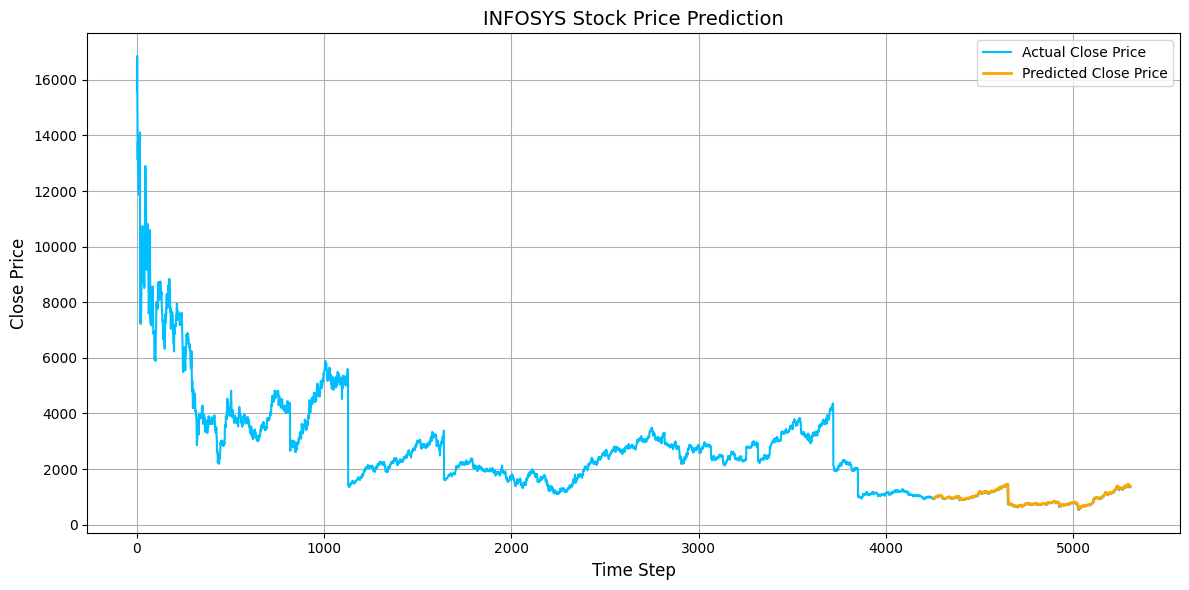

In [63]:

# Plot Forecast-Style
plt.figure(figsize=(12, 6))

# Plot full actual close prices
plt.plot(scaler.inverse_transform(close_scaled), label='Actual Close Price', color='deepskyblue')

# Create empty array for forecast-style plot
pred_plot = np.empty_like(close_scaled)
pred_plot[:, :] = np.nan
pred_plot[len(close_scaled) - len(y_pred_inverse):, :] = y_pred_inverse.reshape(-1, 1)

plt.plot(pred_plot, label='Predicted Close Price', color='orange', linewidth=2)
plt.title("INFOSYS Stock Price Prediction", fontsize=14)
plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Model evaluation metrics
models = ['ARIMA', 'ARIMAX', 'LSTM']
companies = ['TCS', 'Infosys']

mae = {
    'TCS': [499.54, 28.82, 45.45],
    'Infosys': [201.01, 9.91, 19.80]
}

rmse = {
    'TCS': [538.18, 38.32, 95.91],
    'Infosys': [233.64, 13.82, 36.27]
}


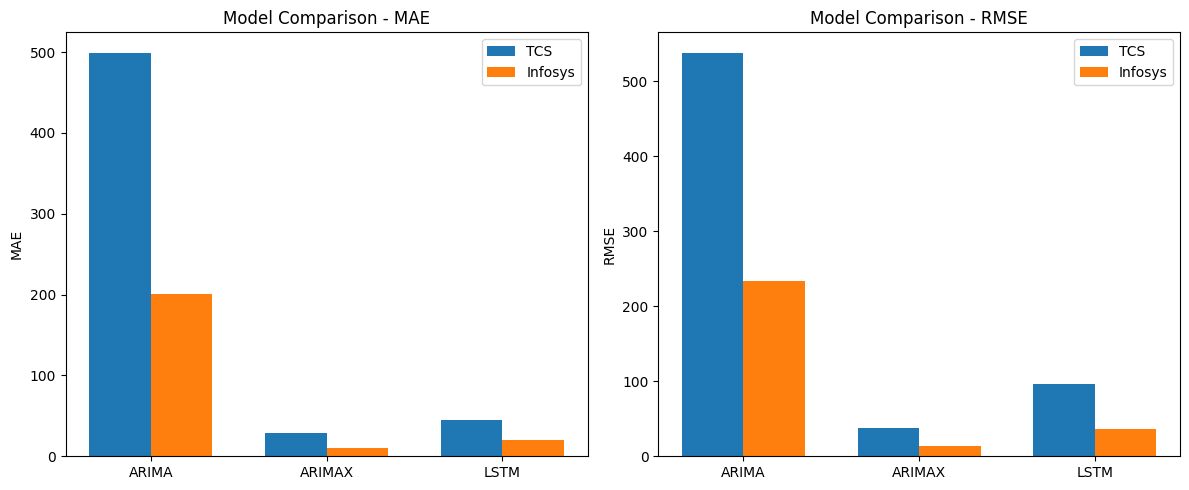

In [71]:
x = np.arange(len(models))
width = 0.35  # width of the bars

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# MAE plot
axs[0].bar(x - width/2, mae['TCS'], width, label='TCS')
axs[0].bar(x + width/2, mae['Infosys'], width, label='Infosys')
axs[0].set_title('Model Comparison - MAE')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylabel('MAE')
axs[0].legend()


# RMSE plot
axs[1].bar(x - width/2, rmse['TCS'], width, label='TCS')
axs[1].bar(x + width/2, rmse['Infosys'], width, label='Infosys')
axs[1].set_title('Model Comparison - RMSE')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylabel('RMSE')
axs[1].legend()

plt.tight_layout()
plt.show()
